# Task 2 — Titanic EDA

This notebook follows the internship requirements: load Titanic dataset, clean missing values, create features, compute survival rates by key dimensions, and save visuals & clean CSV.

In [ ]:
# Setup (run once)
!pip install --quiet pandas numpy matplotlib openpyxl scikit-learn
import os
import pandas as pd, numpy as np, matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
os.makedirs('/content/internship/data/raw', exist_ok=True)
os.makedirs('/content/internship/data/clean', exist_ok=True)
os.makedirs('/content/internship/images', exist_ok=True)
os.makedirs('/content/internship/reports', exist_ok=True)
print('Environment ready. Place datasets in /content/internship/data/raw or upload when prompted.')

Environment ready. Place datasets in /content/internship/data/raw or upload when prompted.


In [4]:
# Upload or ensure file at /content/internship/data/raw/titanic_train.csv
titanic_path = '/content/internship/data/raw/titanic_train.csv'
if not os.path.exists(titanic_path):
    from google.colab import files
    uploaded = files.upload()
    for fn in uploaded:
        open(titanic_path, 'wb').write(uploaded[fn])
print('File ready:', titanic_path)

Saving train.csv to train (1).csv
File ready: /content/internship/data/raw/titanic_train.csv


In [7]:
import pandas as pd
df = pd.read_csv('/content/internship/data/raw/titanic_train.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Overview & missing
print(df.info())
mis = df.isna().sum().sort_values(ascending=False)
pct = (mis / len(df) * 100).round(2)
display(pd.DataFrame({'missing': mis, '%': pct}))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,missing,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00


In [9]:
# Cleaning & features
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
if {'Age','Sex','Pclass'}.issubset(df.columns):
    df['Age'] = df.groupby(['Sex','Pclass'])['Age'].transform(lambda s: s.fillna(s.median()))
if {'SibSp','Parch'}.issubset(df.columns):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
if 'Age' in df.columns:
    bins = [0,12,18,35,50,80]
    labels = ['Child','Teen','YoungAdult','Adult','Senior']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
if 'Sex' in df.columns:
    df['Sex_num'] = df['Sex'].map({'male':0,'female':1})
df.to_csv('/content/internship/data/clean/titanic_clean.csv', index=False)
print('Saved cleaned file to /content/internship/data/clean/titanic_clean.csv')

Saved cleaned file to /content/internship/data/clean/titanic_clean.csv


In [10]:
# Survival rates and plots
if 'Survived' in df.columns:
    def rate(s): return s.mean().round(3)
    print('Survival by Sex:'); display(df.groupby('Sex')['Survived'].apply(rate))
    print('Survival by Pclass:'); display(df.groupby('Pclass')['Survived'].apply(rate))
    if 'AgeGroup' in df.columns:
        print('Survival by AgeGroup:'); display(df.groupby('AgeGroup')['Survived'].apply(rate))
    if 'Embarked' in df.columns:
        print('Survival by Embarked:'); display(df.groupby('Embarked')['Survived'].apply(rate))

Survival by Sex:


,Survived
Sex,
female,0.742
male,0.189


Survival by Pclass:


,Survived
Pclass,
1,0.630
2,0.473
3,0.242


Survival by AgeGroup:


/tmp/ipython-input-587888933.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print('Survival by AgeGroup:'); display(df.groupby('AgeGroup')['Survived'].apply(rate))


,Survived
AgeGroup,
Child,0.574
Teen,0.489
YoungAdult,0.337
Adult,0.424
Senior,0.356


Survival by Embarked:


,Survived
Embarked,
C,0.554
Q,0.390
S,0.339


Saved /content/internship/images/t2_survival_by_sex.png


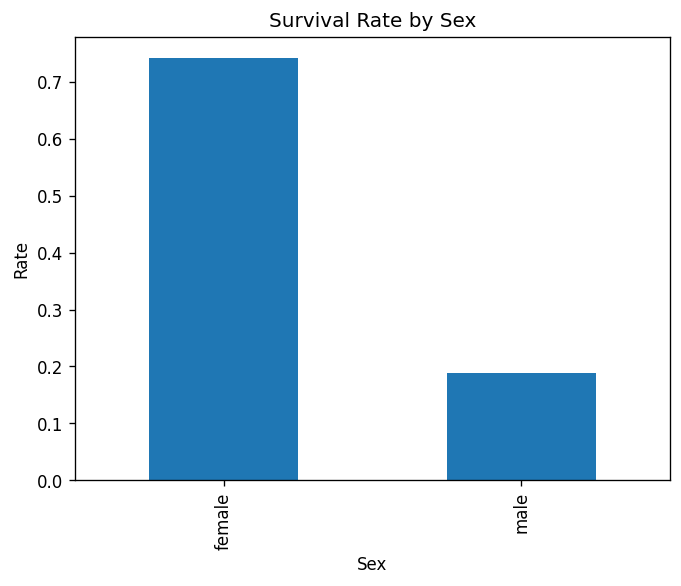

Saved /content/internship/images/t2_survival_by_class.png


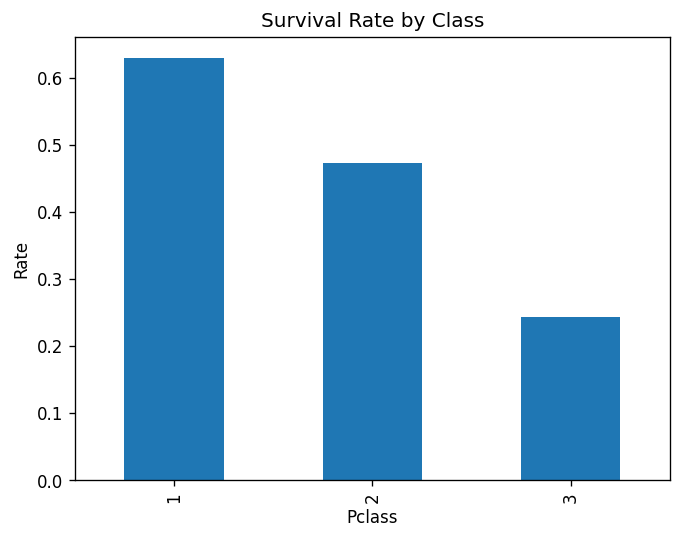

/tmp/ipython-input-596063197.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fig = plt.figure(); df.groupby('AgeGroup')['Survived'].mean().plot(kind='bar', title='Survival Rate by AgeGroup'); plt.ylabel('Rate'); save_plot(fig,'t2_survival_by_agegroup.png')


Saved /content/internship/images/t2_survival_by_agegroup.png


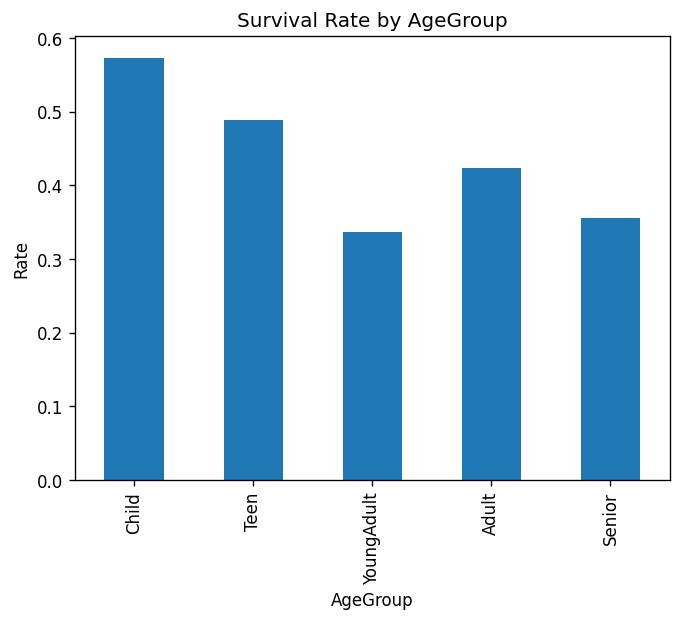

In [11]:
# Plots (matplotlib)
import matplotlib.pyplot as plt
def save_plot(fig, name):
    path = f'/content/internship/images/{name}'
    fig.savefig(path, bbox_inches='tight', dpi=150)
    print('Saved', path)
    plt.show()

fig = plt.figure(); df.groupby('Sex')['Survived'].mean().plot(kind='bar', title='Survival Rate by Sex'); plt.ylabel('Rate'); save_plot(fig,'t2_survival_by_sex.png')
fig = plt.figure(); df.groupby('Pclass')['Survived'].mean().plot(kind='bar', title='Survival Rate by Class'); plt.ylabel('Rate'); save_plot(fig,'t2_survival_by_class.png')
if 'AgeGroup' in df.columns:
    fig = plt.figure(); df.groupby('AgeGroup')['Survived'].mean().plot(kind='bar', title='Survival Rate by AgeGroup'); plt.ylabel('Rate'); save_plot(fig,'t2_survival_by_agegroup.png')

## Deliverables
- `titanic_clean.csv` saved in `/content/internship/data/clean`
- 2–3 charts saved in `/content/internship/images/`
- Add a short markdown report in `/content/internship/reports/Task2_Report.md` describing key findings and limitations.